In [1]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [2]:
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(42)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [3]:
print(data[10])



(['Law Enforcement', 'FULL_TIME', 'OH', 'Entry level'], '78000.0')


In [4]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [5]:
from src.models.mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [float(target) for _, target in val_data])

In [6]:
from mlp import MLP, train_model
total_features = len(vocab_type) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=64, output_size=1)  

Iter 50: Loss: 4914236416.0 Train mae 77429.95560732236, Validation mae 90332.67207938684
Iter 100: Loss: 5777867264.0 Train mae 76784.43505361912, Validation mae 89809.73491191796
Iter 150: Loss: 4053256448.0 Train mae 76295.98855357224, Validation mae 89408.92851963673
Iter 200: Loss: 5018121216.0 Train mae 76056.88891835349, Validation mae 89035.22375296093
Iter 250: Loss: 66332158590976.0 Train mae 75627.8453721524, Validation mae 88614.92946940618
Iter 300: Loss: 5210323456.0 Train mae 75499.44775146492, Validation mae 88139.03958071093
Iter 350: Loss: 3682052096.0 Train mae 75130.8620893106, Validation mae 88059.69544514059
Iter 400: Loss: 2291589376.0 Train mae 74928.34446480277, Validation mae 87918.51388328907
Iter 450: Loss: 3051415808.0 Train mae 74833.9842808985, Validation mae 87643.41021370307
Iter 500: Loss: 6280090624.0 Train mae 74512.08324734375, Validation mae 87685.57143562504
Iter 550: Loss: 3785545728.0 Train mae 74425.236094045, Validation mae 87304.7644525312
It

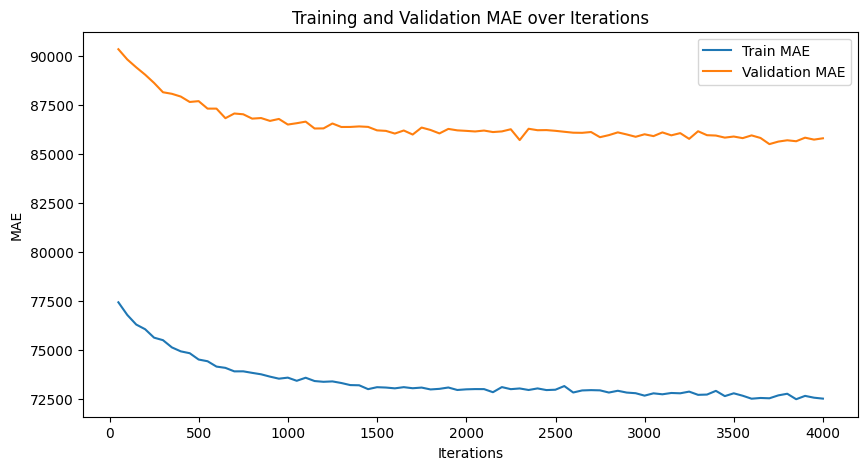

In [8]:
train_model(model, train_one_hot, val_one_hot, 0.01, batch_size=160, num_epochs=30)